In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

In [2]:
from optimus import Optimus
op= Optimus()

## Loading data
Now Optimus can load data in csv, json, parquet, avro excel from a local file or URL.

In [3]:
df = op.load.excel("examples/data/titanic3.xls")

In [ ]:
df.table()

In [ ]:
df.cols.select("name").limit(5).table()

In [ ]:
df.table()

In [3]:
print(df.cols.min("*"))

NameError: name 'df' is not defined

In [4]:
print(df.cols.min("age"))
print(df.cols.max("age"))
print(df.cols.median("age",0))

print(df.cols.percentile("age", 0.25,0))
print(df.cols.percentile("age",0.75,0))
print(df.cols.mode("age"))
print(df.cols.std("age"))
df.cols.abs("age").table(10)

NameError: name 'df' is not defined

In [9]:
#fix
print(df.cols.median(["name","age"],0))

['name'] column(s) was not processed because is not ['byte', 'short', 'big', 'int', 'double', 'float']
{'age': {'0.5': 28.0}}
28.0


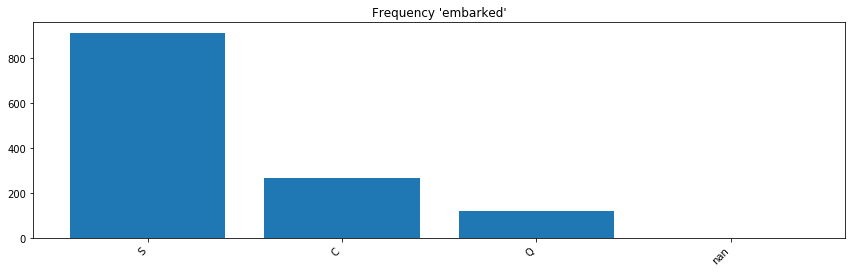

In [10]:
df.plot.frequency("embarked")

{'age': {'0.25': 21.0, '0.5': 28.0, '0.75': 39.0}}


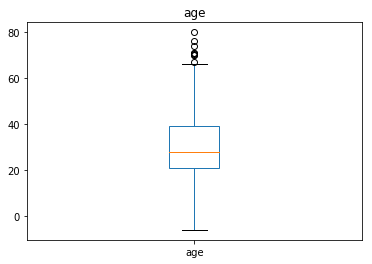

<Figure size 864x360 with 0 Axes>

In [11]:
df.plot.box("age")
# df.plot.box("fare")

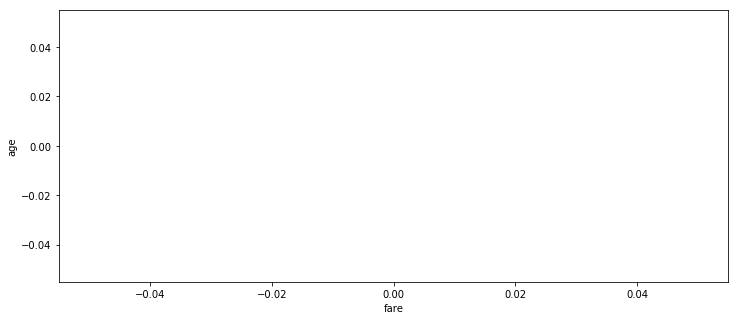

In [12]:
df.plot.scatter(["age","fare"])

In [13]:
df.cols.value_counts(["pclass", "embarked"]).table()

pclass 1 (bigint) nullable,embarked 2 (string) nullable,count 3 (bigint)
1,nan,2
1,Q,3
2,Q,7
2,C,28
3,C,101
3,Q,113
1,C,141
1,S,177
2,S,242
3,S,495


## Stratify

In [20]:
pdf = df.cols.stratify(["pclass","embarked"])

      0    1    2
1Q    1    Q    3
1nan  1  nan    2
1C    1    C  141
1S    1    S  177
3Q    3    Q  113
3C    3    C  101
3S    3    S  495
2Q    2    Q    7
2C    2    C   28
2S    2    S  242


In [139]:
# df.cols.fill_na("last position seen", "2").table()
df.cols.impute("embarked", "categorical").table()

Including 'nan' as Null in 'embarked'
2 values imputed for column(s) 'embarked' with 'S'


pclass 1 (bigint) nullable,survived 2 (bigint) nullable,name 3 (string) nullable,sex 4 (string) nullable,age 5 (double) nullable,sibsp 6 (bigint) nullable,parch 7 (bigint) nullable,ticket 8 (string) nullable,fare 9 (double) nullable,cabin 10 (string) nullable,embarked 11 (string) nullable,boat 12 (string) nullable,body 13 (double) nullable,home_dest 14 (string) nullable
1,1,"Allen,⸱Miss.⸱Elisabeth⸱Walton",female,29.0,0,0,24160,211.3375,B5,S,2,nan,"St⸱Louis,⸱MO"
1,1,"Allison,⸱Master.⸱Hudson⸱Trevor",male,0.9167,1,2,113781,151.55,C22⸱C26,S,11,nan,"Montreal,⸱PQ⸱/⸱Chesterville,⸱ON"
1,0,"Allison,⸱Miss.⸱Helen⸱Loraine",female,2.0,1,2,113781,151.55,C22⸱C26,S,nan,nan,"Montreal,⸱PQ⸱/⸱Chesterville,⸱ON"
1,0,"Allison,⸱Mr.⸱Hudson⸱Joshua⸱Creighton",male,30.0,1,2,113781,151.55,C22⸱C26,S,nan,135.0,"Montreal,⸱PQ⸱/⸱Chesterville,⸱ON"
1,0,"Allison,⸱Mrs.⸱Hudson⸱J⸱C⸱(Bessie⸱Waldo⸱Daniels)",female,25.0,1,2,113781,151.55,C22⸱C26,S,nan,nan,"Montreal,⸱PQ⸱/⸱Chesterville,⸱ON"
1,1,"Anderson,⸱Mr.⸱Harry",male,48.0,0,0,19952,26.55,E12,S,3,nan,"New⸱York,⸱NY"
1,1,"Andrews,⸱Miss.⸱Kornelia⸱Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,nan,"Hudson,⸱NY"
1,0,"Andrews,⸱Mr.⸱Thomas⸱Jr",male,39.0,0,0,112050,0.0,A36,S,nan,nan,"Belfast,⸱NI"
1,1,"Appleton,⸱Mrs.⸱Edward⸱Dale⸱(Charlotte⸱Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,nan,"Bayside,⸱Queens,⸱NY"
1,0,"Artagaveytia,⸱Mr.⸱Ramon",male,71.0,0,0,PC⸱17609,49.5042,nan,C,nan,22.0,"Montevideo,⸱Uruguay"


In [132]:
df.cols.impute("age","continuous").table()

263 values imputed for column(s) 'age'



pclass 1 (bigint) nullable,survived 2 (bigint) nullable,name 3 (string) nullable,sex 4 (string) nullable,age 5 (float) nullable,sibsp 6 (bigint) nullable,parch 7 (bigint) nullable,ticket 8 (string) nullable,fare 9 (double) nullable,cabin 10 (string) nullable,embarked 11 (string) nullable,boat 12 (string) nullable,body 13 (double) nullable,home_dest 14 (string) nullable,age_imputed 15 (float) nullable
1,1,"Allen,⸱Miss.⸱Elisabeth⸱Walton",female,29.0,0,0,24160,211.3375,B5,S,2,nan,"St⸱Louis,⸱MO",29.0
1,1,"Allison,⸱Master.⸱Hudson⸱Trevor",male,0.916700005531311,1,2,113781,151.55,C22⸱C26,S,11,nan,"Montreal,⸱PQ⸱/⸱Chesterville,⸱ON",0.916700005531311
1,0,"Allison,⸱Miss.⸱Helen⸱Loraine",female,2.0,1,2,113781,151.55,C22⸱C26,S,nan,nan,"Montreal,⸱PQ⸱/⸱Chesterville,⸱ON",2.0
1,0,"Allison,⸱Mr.⸱Hudson⸱Joshua⸱Creighton",male,30.0,1,2,113781,151.55,C22⸱C26,S,nan,135.0,"Montreal,⸱PQ⸱/⸱Chesterville,⸱ON",30.0
1,0,"Allison,⸱Mrs.⸱Hudson⸱J⸱C⸱(Bessie⸱Waldo⸱Daniels)",female,25.0,1,2,113781,151.55,C22⸱C26,S,nan,nan,"Montreal,⸱PQ⸱/⸱Chesterville,⸱ON",25.0
1,1,"Anderson,⸱Mr.⸱Harry",male,48.0,0,0,19952,26.55,E12,S,3,nan,"New⸱York,⸱NY",48.0
1,1,"Andrews,⸱Miss.⸱Kornelia⸱Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,nan,"Hudson,⸱NY",63.0
1,0,"Andrews,⸱Mr.⸱Thomas⸱Jr",male,39.0,0,0,112050,0.0,A36,S,nan,nan,"Belfast,⸱NI",39.0
1,1,"Appleton,⸱Mrs.⸱Edward⸱Dale⸱(Charlotte⸱Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,nan,"Bayside,⸱Queens,⸱NY",53.0
1,0,"Artagaveytia,⸱Mr.⸱Ramon",male,71.0,0,0,PC⸱17609,49.5042,nan,C,nan,22.0,"Montevideo,⸱Uruguay",71.0


Note that you can use Optimus functions and Spark functions(`.WithColumn()`) at the same time. To know about all the Optimus functionality please go to this [notebooks](examples/)

### Custom functions
Spark have multiple ways to transform your data like rdd, Column Expression ,udf and pandas udf. In Optimus we create the `apply()` and `apply_expr` which handle all the implementation complexity.

Here you apply a function to the "billingid" column. Sum 1 and 2 to the current column value. All powered by Pandas UDF

In [25]:
def func(value, args):
    return value + args[0] + args[1]

df.cols.apply("billingid",func,"int", [1,2]).table()

id 1 (int) nullable,firstName 2 (string) nullable,lastName 3 (string) nullable,billingid 4 (int) nullable,product 5 (string) nullable,price 6 (int) nullable,birth 7 (string) nullable,dummyCol 8 (string) nullable
1,Luis,Alvarez$$%!,126,Cake,10,1980/07/07,never
2,André,Ampère,426,piza,8,1950/07/08,gonna
3,NiELS,Böhr//((%%,554,pizza,8,1990/07/09,give
4,PAUL,dirac$,524,pizza,8,1954/07/10,you
5,Albert,Einstein,637,pizza,8,1990/07/11,up
6,Galileo,⸱⸱⸱⸱⸱⸱⸱⸱⸱⸱⸱⸱⸱GALiLEI,675,arepa,5,1930/08/12,never
7,CaRL,Ga%%%uss,326,taco,3,1970/07/13,gonna
8,David,H$$$ilbert,627,taaaccoo,3,1950/07/14,let
9,Johannes,KEPLER,738,taco,3,1920/04/22,you
10,JaMES,M$$ax%%well,878,taco,3,1923/03/12,down


If you want to apply a Column Expression use `apply_expr()` like this. In this case we pasa an argument 10 to divide the actual column value

In [26]:
def func(col_name, args):
    return F.col(col_name)/20

df.cols.apply_expr("billingid", func, 20).table()

id 1 (int) nullable,firstName 2 (string) nullable,lastName 3 (string) nullable,billingid 4 (double) nullable,product 5 (string) nullable,price 6 (int) nullable,birth 7 (string) nullable,dummyCol 8 (string) nullable
1,Luis,Alvarez$$%!,6.15,Cake,10,1980/07/07,never
2,André,Ampère,21.15,piza,8,1950/07/08,gonna
3,NiELS,Böhr//((%%,27.55,pizza,8,1990/07/09,give
4,PAUL,dirac$,26.05,pizza,8,1954/07/10,you
5,Albert,Einstein,31.7,pizza,8,1990/07/11,up
6,Galileo,⸱⸱⸱⸱⸱⸱⸱⸱⸱⸱⸱⸱⸱GALiLEI,33.6,arepa,5,1930/08/12,never
7,CaRL,Ga%%%uss,16.15,taco,3,1970/07/13,gonna
8,David,H$$$ilbert,31.2,taaaccoo,3,1950/07/14,let
9,Johannes,KEPLER,36.75,taco,3,1920/04/22,you
10,JaMES,M$$ax%%well,43.75,taco,3,1923/03/12,down


In [16]:
df.table()

pclass 1 (bigint) nullable,survived 2 (bigint) nullable,name 3 (string) nullable,sex 4 (string) nullable,age 5 (double) nullable,sibsp 6 (bigint) nullable,parch 7 (bigint) nullable,ticket 8 (string) nullable,fare 9 (double) nullable,cabin 10 (string) nullable,embarked 11 (string) nullable,boat 12 (string) nullable,body 13 (double) nullable,home_dest 14 (string) nullable
1,1,"Allen,⸱Miss.⸱Elisabeth⸱Walton",female,29.0,0,0,24160,211.3375,B5,S,2,nan,"St⸱Louis,⸱MO"
1,1,"Allison,⸱Master.⸱Hudson⸱Trevor",male,0.9167,1,2,113781,151.55,C22⸱C26,S,11,nan,"Montreal,⸱PQ⸱/⸱Chesterville,⸱ON"
1,0,"Allison,⸱Miss.⸱Helen⸱Loraine",female,2.0,1,2,113781,151.55,C22⸱C26,S,nan,nan,"Montreal,⸱PQ⸱/⸱Chesterville,⸱ON"
1,0,"Allison,⸱Mr.⸱Hudson⸱Joshua⸱Creighton",male,30.0,1,2,113781,151.55,C22⸱C26,S,nan,135.0,"Montreal,⸱PQ⸱/⸱Chesterville,⸱ON"
1,0,"Allison,⸱Mrs.⸱Hudson⸱J⸱C⸱(Bessie⸱Waldo⸱Daniels)",female,25.0,1,2,113781,151.55,C22⸱C26,S,nan,nan,"Montreal,⸱PQ⸱/⸱Chesterville,⸱ON"
1,1,"Anderson,⸱Mr.⸱Harry",male,48.0,0,0,19952,26.55,E12,S,3,nan,"New⸱York,⸱NY"
1,1,"Andrews,⸱Miss.⸱Kornelia⸱Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,nan,"Hudson,⸱NY"
1,0,"Andrews,⸱Mr.⸱Thomas⸱Jr",male,39.0,0,0,112050,0.0,A36,S,nan,nan,"Belfast,⸱NI"
1,1,"Appleton,⸱Mrs.⸱Edward⸱Dale⸱(Charlotte⸱Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,nan,"Bayside,⸱Queens,⸱NY"
1,0,"Artagaveytia,⸱Mr.⸱Ramon",male,71.0,0,0,PC⸱17609,49.5042,nan,C,nan,22.0,"Montevideo,⸱Uruguay"


In [31]:
df.outliers.iqr("fare").remove().table()

pclass 1 (bigint) nullable,survived 2 (bigint) nullable,name 3 (string) nullable,sex 4 (string) nullable,age 5 (double) nullable,sibsp 6 (bigint) nullable,parch 7 (bigint) nullable,ticket 8 (string) nullable,fare 9 (double) nullable,cabin 10 (string) nullable,embarked 11 (string) nullable,boat 12 (string) nullable,body 13 (double) nullable,home_dest 14 (string) nullable
1,1,"Anderson,⸱Mr.⸱Harry",male,48.0,0,0,19952,26.55,E12,S,3,nan,"New⸱York,⸱NY"
1,0,"Andrews,⸱Mr.⸱Thomas⸱Jr",male,39.0,0,0,112050,0.0,A36,S,nan,nan,"Belfast,⸱NI"
1,1,"Appleton,⸱Mrs.⸱Edward⸱Dale⸱(Charlotte⸱Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,nan,"Bayside,⸱Queens,⸱NY"
1,0,"Artagaveytia,⸱Mr.⸱Ramon",male,71.0,0,0,PC⸱17609,49.5042,nan,C,nan,22.0,"Montevideo,⸱Uruguay"
1,1,"Barkworth,⸱Mr.⸱Algernon⸱Henry⸱Wilson",male,80.0,0,0,27042,30.0,A23,S,B,nan,"Hessle,⸱Yorks"
1,0,"Baumann,⸱Mr.⸱John⸱D",male,nan,0,0,PC⸱17318,25.925,nan,S,nan,nan,"New⸱York,⸱NY"
1,1,"Beckwith,⸱Mr.⸱Richard⸱Leonard",male,37.0,1,1,11751,52.5542,D35,S,5,nan,"New⸱York,⸱NY"
1,1,"Beckwith,⸱Mrs.⸱Richard⸱Leonard⸱(Sallie⸱Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,5,nan,"New⸱York,⸱NY"
1,1,"Behr,⸱Mr.⸱Karl⸱Howell",male,26.0,0,0,111369,30.0,C148,C,5,nan,"New⸱York,⸱NY"
1,0,"Birnbaum,⸱Mr.⸱Jakob",male,25.0,0,0,13905,26.0,nan,C,nan,148.0,"San⸱Francisco,⸱CA"


In [32]:
df.outliers.iqr("fare").select().table()

pclass 1 (bigint) nullable,survived 2 (bigint) nullable,name 3 (string) nullable,sex 4 (string) nullable,age 5 (double) nullable,sibsp 6 (bigint) nullable,parch 7 (bigint) nullable,ticket 8 (string) nullable,fare 9 (double) nullable,cabin 10 (string) nullable,embarked 11 (string) nullable,boat 12 (string) nullable,body 13 (double) nullable,home_dest 14 (string) nullable
1,1,"Allen,⸱Miss.⸱Elisabeth⸱Walton",female,29.0,0,0,24160,211.3375,B5,S,2,nan,"St⸱Louis,⸱MO"
1,1,"Allison,⸱Master.⸱Hudson⸱Trevor",male,0.9167,1,2,113781,151.55,C22⸱C26,S,11,nan,"Montreal,⸱PQ⸱/⸱Chesterville,⸱ON"
1,0,"Allison,⸱Miss.⸱Helen⸱Loraine",female,2.0,1,2,113781,151.55,C22⸱C26,S,nan,nan,"Montreal,⸱PQ⸱/⸱Chesterville,⸱ON"
1,0,"Allison,⸱Mr.⸱Hudson⸱Joshua⸱Creighton",male,30.0,1,2,113781,151.55,C22⸱C26,S,nan,135.0,"Montreal,⸱PQ⸱/⸱Chesterville,⸱ON"
1,0,"Allison,⸱Mrs.⸱Hudson⸱J⸱C⸱(Bessie⸱Waldo⸱Daniels)",female,25.0,1,2,113781,151.55,C22⸱C26,S,nan,nan,"Montreal,⸱PQ⸱/⸱Chesterville,⸱ON"
1,1,"Andrews,⸱Miss.⸱Kornelia⸱Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,nan,"Hudson,⸱NY"
1,0,"Astor,⸱Col.⸱John⸱Jacob",male,47.0,1,0,PC⸱17757,227.525,C62⸱C64,C,nan,124.0,"New⸱York,⸱NY"
1,1,"Astor,⸱Mrs.⸱John⸱Jacob⸱(Madeleine⸱Talmadge⸱Force)",female,18.0,1,0,PC⸱17757,227.525,C62⸱C64,C,4,nan,"New⸱York,⸱NY"
1,1,"Aubart,⸱Mme.⸱Leontine⸱Pauline",female,24.0,0,0,PC⸱17477,69.3,B35,C,9,nan,"Paris,⸱France"
1,1,"Barber,⸱Miss.⸱Ellen⸱""Nellie""",female,26.0,0,0,19877,78.85,nan,S,6,nan,nan
